In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)


In [5]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [6]:
stores_clust_info_combined3 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',index_col=0, dtype=sdtypes,)

In [7]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

### drop 18 outlier stores

In [8]:
stores_clust_info_combined4 = stores_clust_info_combined3.loc[stores_clust_info_combined3.n_clusters_4 != 2]
stores_clust_info_combined4.shape

(1930, 57)

In [9]:
stores_clust_info_combined3.shape

(1948, 57)

In [10]:
# stores_clust_info_combined4.columns

### drop scaled features

In [11]:
# stores_clust_info_combined4 = 
# stores_clust_info_combined4 = 
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns = ['tot_num_unique_items_scaled',
       'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
       'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled',
       'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled', 'cl_High_End_scaled',
       'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled',
       'cl_Popular_Bottles_scaled', 'cl_Quick_Shots_scaled',
       'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled',
       'n_clusters_2', 'n_clusters_4'])

In [12]:
stores_clust_info_combined4.shape

(1930, 41)

### make a copy of stores_clust_info_combined4

In [13]:
stores_clust_info_combined4_copy = stores_clust_info_combined4.copy()

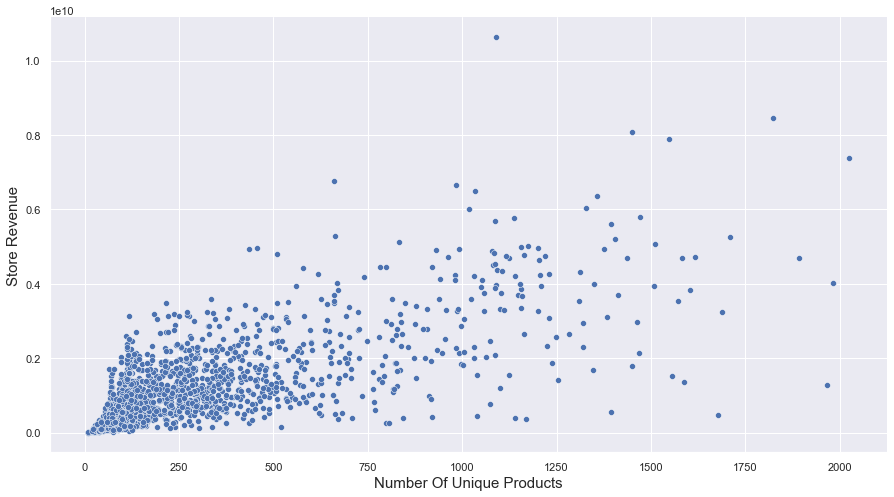

In [14]:

sns.set(rc = {'figure.figsize':(15,8)})
scatter = sns.scatterplot(x = 'tot_num_unique_items',y = 'store_revenue',data = stores_clust_info_combined4) #hue='label'
scatter.set_xlabel('Number Of Unique Products',fontsize=15)
scatter.set_ylabel('Store Revenue',fontsize=15)
sns.despine()

In [15]:
stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,"4,028,389,918.1",1983,7,9923,22.306852041865653,0.297399497902889,3.6357689153159134,13.702351636068652,49.16512047706984,1.0891686495604729,9.80333878221658,11.367529980852565,1.279854882595989,12.738083240955357,51.49652322886224,5.280661090396049,6.066713695455003,11.770633880882798,6.101865859808371,2.4710035300050426,17.95259707513868,54.36207766011094,1.9667170953101365,7.261724659606656,9.88401412002017,88.97058823529412,31.210191082802545,40.59293044469784,49.02228285584357,92.85714285714286,33.02752293577982,43.17180616740088
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,"8,451,653,814.22",1823,7,13453,26.98651910532016,0.1955763995230026,2.9792234851876493,10.62478420045028,49.54070606696303,0.2039617341045919,9.469229008451288,17.527688991303055,1.4197576748680591,11.016130231175204,52.8506652791199,7.909016576228351,2.244852449267821,7.031888798037612,4.71749862863412,3.2912781130005486,20.899616017553484,55.62260010970928,1.6456390565002743,8.228195282501371,5.595172792100932,63.23529411764706,38.21656050955414,43.44355758266818,46.1118690313779,71.42857142857143,34.403669724770644,22.46696035242291
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.","7,370,230,566.75",2025,7,15428,18.839015207529226,0.5137403498720741,3.97409309189574,10.552697507846933,52.08916007254435,1.6330552383665022,12.39823853194518,11.647653616800625,2.2815659839253306,14.551464869069225,44.62665283899403,6.501166709878143,9.197562872698988,11.193933108633653,5.728395061728396,3.950617283950617,22.17283950617284,50.17283950617284,1.925925925925926,7.358024691358024,8.691358024691358,85.29411764705883,50.955414012738856,51

create outlier data frame

In [16]:
outliers_df = stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

### remove 5 out liers

In [17]:
filt = stores_clust_info_combined4.tot_num_unique_items > 1750

In [18]:
stores_clust_info_combined4 = stores_clust_info_combined4[~filt]

In [19]:
#      'tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
#      'rev_Cheap',
     
#      'rev_Moderately_High',
#      'rev_Most_Variety',
#      'rev_Popular_Bottles',
#      'rev_Quick_Shots',
#      'rev_Volume_For_Dollar',
#      'item_Cheap',
     
#      'item_Moderately_High',
#      'item_Most_Variety',
#      'item_Popular_Bottles',
#      'item_Quick_Shots',
#      'item_Volume_For_Dollar',
#      'cl_Cheap',
#      'cl_High_End',
#      'cl_Moderately_High',
#      'cl_Most_Variety',
#      'cl_Popular_Bottles',
#      'cl_Quick_Shots',
#      'cl_Volume_For_Dollar'

In [20]:
features = ['store_revenue','tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [21]:
scaled_features = ['store_revenue_scaled','tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [22]:
stores_clust_info_combined4 = stores_clust_info_combined4.reset_index()


In [23]:
stores_clust_info_combined4.head()

,index,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
0,0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0
1,1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005
2,2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,"24,308,995.32",14,4,14,6.779766330548622,0.0,0.0,0.1961223792773349,86.98117977176855,0.0,6.042931518405508,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,2.2058823529411766,0.0,0.0,0.045475216007276,16.666666666666664,0.0,0.6607929515418502
3,3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,"11,723,322.21",33,5,33,24.31773484454967,0.0,0.0,8.17652311204368,27.538225019919505,2.951211131132085,37.01630589235507,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,3.6764705882352944,0.0,0.0,0.4547521600727603,7.142857142857142,2.064220183486239,1.3215859030837005
4,4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,"6,766,721.37",13,4,13,49.1369431101609,0.0,0.0,6.083004124048927,44.51670514106007,0.2633476247301136,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,3.6764705882352944,0.0,0.0,0.1819008640291041,7.142857142857142,0.2293577981651376,0.0


In [24]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['index'])

In [25]:
scaler = StandardScaler()

In [26]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

scale features

In [27]:
stores_clust_info_combined4[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined4[features])


In [28]:
stores_clust_info_combined4[scaled_features].describe()

,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,-3.041722717856143e-16,4.559123641382785e-16,-3.837334490568041e-16,1.0858269550450817e-15,9.458523430572763e-18,9.65432640037029e-16,-8.679925465251224e-17,-3.5356998714101415e-16,4.664522736317979e-15,-2.375271696502585e-15,9.902612640422825e-17,2.3611704222417613e-16,2.1685395182288772e-16,1.3138119740758995e-15,-3.031946987847106e-15
std,1.000259841501072,1.0002598415010715,1.0002598415010728,1.000259841501069,1.0002598415010722,1.0002598415010728,1.0002598415010724,1.000259841501072,1.0002598415010777,1.0002598415010737,1.0002598415010717,1.0002598415010753,1.0002598415010722,1.0002598415010728,1.0002598415010706
min,-1.0209021505356213,-0.8831767555039094,-2.7088945141536414,-0.5567704605715388,-1.0427622845943378,-5.183857836759887,-1.1544175283619036,-1.9706706210413456,-0.43810044669216064,-0.4962548677508225,-0.6762060609228074,-3.378037108882044,-0.8518686283523119,-0.793981224163699,-5.145250637159427
25%,-0.659257856905999,-0.6029906536377758,-0.6883176298167614,-0.5567704605715388,-0.7215953721739656,-0.7089685223293651,-0.8022215247198574,-0.6348712490654459,-0.43810044669216064,-0.4962548677508225,-0.5769715214454803,-0.6131570397473302,-0.6691034944174415,-0.6603318837898688,-0.956813180120883
50%,-0.31980500151827806,-0.45108252611999256,-0.1112154817197646,-0.5022023361948587,-0.3918255872269455,0.11174432107726566,-0.3605454871689411,-0.2039682258474138,-0.43810044669216064,-0.44761976845236345,-0.47153482325082013,0.07806297753634882,-0.4080104459390553,-0.5044076533537338,0.09029618413875301
75%,0.3027485749638378,0.20718602645706824,0.5278120502856232,0.161044880105285,0.39759948562240593,0.8228840264957427,0.6788762001342366,0.4854766113014383,-0.11943679285410685,-0.058538974064690705,0.1300745723304757,0.6310389913632918,0.24472217525691034,0.38658794913846656,1.137405548398389
max,8.727601130398927,4.855574728501236,8.849417256122818,10.719247667911723,6.130693199905121,2.0297245921499103,4.158416868003454,3.286346262218647,10.396463783801668,8.695778899657943,5.116610181066164,2.4282110363008558,5.571020364215989,5.019765082097908,1.137405548398389


In [29]:
stores_clust_info_combined4.store_revenue.corr(stores_clust_info_combined4.tot_num_unique_items)

0.7279811881545474

In [30]:
stores_clust_info_combined4.shape

(1925, 56)

In [31]:
# stores_clust_info_combined4.info()

In [32]:
from sklearn.metrics import silhouette_score

cluster_cols = [       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.43408093333582126
number of clusters =  3   silhouette score =  0.4399750147928817
number of clusters =  4   silhouette score =  0.40574732255236723
number of clusters =  5   silhouette score =  0.3860722643771712
number of clusters =  6   silhouette score =  0.3086470960680385
number of clusters =  7   silhouette score =  0.29750878756981514
number of clusters =  8   silhouette score =  0.3013589813057504
number of clusters =  9   silhouette score =  0.29845056662528285
number of clusters =  10   silhouette score =  0.304298473357964


In [33]:
from sklearn.metrics import silhouette_score

cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,6):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.4475062643557119
number of clusters =  3   silhouette score =  0.3835062078437221
number of clusters =  4   silhouette score =  0.4223344841413703
number of clusters =  5   silhouette score =  0.34369039286063285


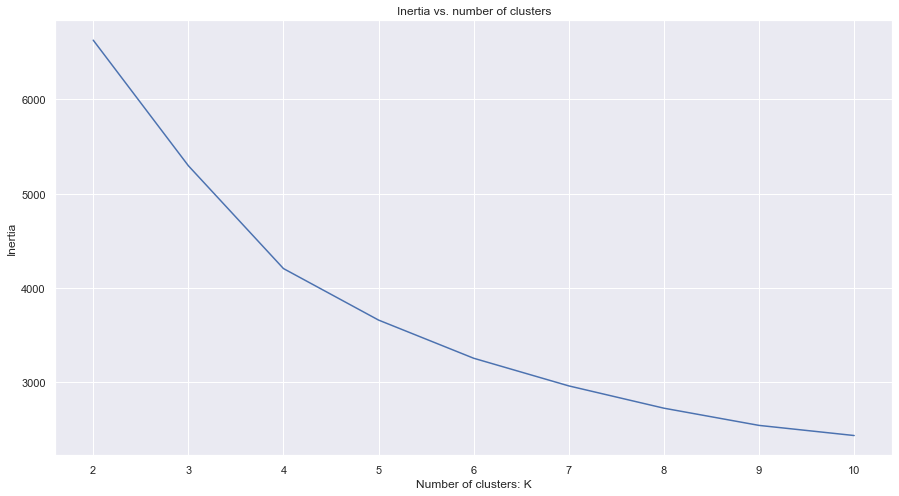

In [34]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()


#### Functions to create a polar graph


In [120]:

# # THEN:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(df, cols, **kwargs):
    df = df.loc[:, cols]
    df = df.to_numpy()
    if 'scaletype' in kwargs and kwargs['scaletype'] == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    scaler.fit(df)
    X = scaler.transform(df)
    dff = pd.DataFrame(X, columns = cols)
    return dff, scaler

def get_kmeans(data, cols, n_clusters = 3, random_state = 42, **kwargs):
    data, scaler = scale(df = data, cols = cols, **kwargs)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 10, tol = 1e-04, random_state = random_state)
    kmeans.fit(data)
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = kmeans.labels_
    polars = clusters.groupby('label').mean().reset_index()
    polars = pd.melt(polars, id_vars = ['label'])
    fig = px.line_polar(polars, r='value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polars, clusters, scaler

def get_clusters(data, cols, cluster_labels):
    data = data[cols]
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = cluster_labels
    polar = clusters.groupby('label').mean().reset_index()
    polar = pd.melt(polar, id_vars = ['label'])
    fig = px.line_polar(polar, r = 'value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polar, clusters, scaler





    
    
 


In [121]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

In [37]:
stores_clust_info_combined4[cols1].describe().round(2)

,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,270.62,17.37,0.66,3.27,68.59,8.79
std,296.31,6.41,1.19,3.13,13.24,7.61
min,9.0,0.0,0.0,0.0,0.0,0.0
25%,92.0,12.96,0.0,1.01,59.21,2.68
50%,137.0,16.66,0.07,2.04,70.07,6.04
75%,332.0,20.76,0.86,4.51,79.48,13.95
max,"1,709.0",74.13,13.46,22.47,95.45,40.44


using functions to create radial graph

In [38]:

# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=3)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=400,
#     height=400,)
# fig.show()



In [39]:
# 1. Red = Supermarkets with lots of alcohol variety
# 1. Blue = Smaller bodegas with lower variety that focus much more than other store types on selling popular bottles 
# 1. Green = Medium-sized mom and pop stores that carry some but not a ton of variety and exist in the middle between two other groups 

### three clusters

In [40]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']


# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=3)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,)
# fig.show()



### three clusters

In [41]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
# 'rev_Moderately_High_scaled',

model = KMeans(n_clusters=3, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['label_1'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [42]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)



In [43]:
# stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue_scaled':['mean','median','std'],
#                                                     'tot_num_unique_items_scaled':['mean','median','std'],
#  'rev_Cheap_scaled':['mean','median','std'],
#  'rev_Moderately_High_scaled':['mean','median','std'],
#  'rev_Most_Variety_scaled':['mean','median','std'],
#  'rev_Popular_Bottles_scaled':['mean','median','std'],
#  'rev_Volume_For_Dollar_scaled':['mean','median','std'],})

In [44]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

# where do I put my store to make the most money
# don't worry about inventory

In [45]:
# 3 Clusters
stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue':['mean','median','std'],
                                                    'tot_num_unique_items':['mean','median','std'],
 'rev_Cheap':['mean','median','std'],
 'rev_Moderately_High':['mean','median','std'],
 'rev_Most_Variety':['mean','median','std'],
 'rev_Popular_Bottles':['mean','median','std'],
 'rev_Volume_For_Dollar':['mean','median','std'],})

Store_Number         store_revenue                    \
               count                  mean            median   
label_1                                                        
0                649 1,352,710,355.2573497  1,174,871,026.65   
1                258  2,325,396,214.730349 1,897,959,085.525   
2               1018   655,973,936.5899508   534,800,860.895   

                              tot_num_unique_items                            \
                          std                 mean median                std   
label_1                                                                        
0         941,004,095.7311078   315.42989214175657  284.0 174.90978741828764   
1       1,805,769,424.0322149     811.546511627907  825.5 403.46190588629634   
2        493,447,896.64988786   104.97053045186641   98.0  49.95123596418425   

                 rev_Cheap                                       \
                      mean             median               std   
label_1                                                           
0       18.946181335371936  17.86401050374062 6.497117675709451   
1       23.571233181356444 22.667644940759725 6.751998488282186   
2       14.799234439058464 14.470104075775305 4.634623291935779   

        rev_Moderately_High                                        \
                       mean             median                std   
label_1                                                             
0        0.7614700408552725 0.4631144274104454 0.8243394277162438   
1        2.7341410204341825  2.328602036867224   1.73512354460689   
2       0.07808247343692645                0.0 0.2553662785339572   

          rev_Most_Variety                                        \
                      mean             median                std   
label_1                                                            
0        4.237565656562694 3.9613011485810463 1.9927039339793855   
1        8.733823786949664  8.613559386932925 3.5081344408919013   
2       1.2611842521742826 1.0672647104705666 0.8485421890678677   

        rev_Popular_Bottles                                       \
                       mean             median               std   
label_1                                                            
0         60.31498222184823 61.563078577245065  7.22845798099804   
1         48.93558706125176  49.87341382415734 8.034463979587274   
2         78.85047339615386   79.0600977195129 5.892037271474415   

        rev_Volume_For_Dollar                                        
                         mean             median                std  
label_1                                                              
0          14.330422024450987  14.17864661229123  7.483707899970229  
1          14.107808997611755 14.362239896064839  7.212855159632581  
2          3.9051807471380453 3.0958657858393597 3.1928227375590477

In [46]:
# 3 Clusters
stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_1,,,,,,,,
0,649,"1,174,871,026.65",284.0,17.86401050374062,0.4631144274104454,3.9613011485810463,61.563078577245065,14.17864661229123
1,258,"1,897,959,085.525",825.5,22.667644940759725,2.328602036867224,8.613559386932925,49.87341382415734,14.362239896064839
2,1018,"534,800,860.895",98.0,14.470104075775305,0.0,1.0672647104705666,79.0600977195129,3.0958657858393597


In [47]:
cols = ['Store_Name',  'City', 'Zip_Code',
        'County', 
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar']

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 0,cols].sample(n=100)

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1215,Fareway Stores #792 / Toledo,Toledo,52342,TAMA,"994,311,878.68",252,7,1051,19.00564040438443,0.004935294554174,0.2856997629125417,6.397534028704096,59.298593259565735,14.871598067027527,27.94117647058824,1.2738853503184715,1.596351197263398,5.366075488858573,42.85714285714285,3.440366972477064,10.352422907488986
1862,Main Street Market Of Anita,Anita,50020,CASS,"1,176,765,956.2",190,6,1143,22.525538788186093,0.0,0.2247460861750582,4.297130765346999,64.74835345427883,8.133009983485108,29.411764705882355,0.0,0.9122006841505133,3.774442928603911,40.47619047619048,2.293577981651376,7.048458149779736
1782,Gasland N 8th St / Burlington,Burlington,52601,DES MOINES,"169,455,292.7",103,7,384,39.924744097414674,0.0321600518530159,1.8740854294957057,1.251367435158312,52.80851106753304,0.0104123451789948,18.38235294117647,0.6369426751592357,1.596351197263398,0.5911778080945885,21.428571428571427,9.174311926605505,0.2202643171806167
1382,Wal-Mart 1965 / Council Bluffs,Council Bluffs,51503,POTTAWATTA,"3,423,569,905.13",425,6,3523,13.090042623884525,0.0,0.1465178888996433,5.623503394556492,59.534754078363264,21.502203135882723,45.588235294117645,0.0,1.026225769669327,9.004092769440655,69.04761904761905,5.963302752293578,22.24669603524229
1415,"Brick Street Market, LLC",Bondurant,50035,POLK,"1,176,451,398.88",533,7,1320,13.59085720941958,0.1104476352560771,1.6731072519220769,5.297746919195707,66.96096289740169,12.239945443312608,35.294117647058826,13.375796178343949,13.911060433295324,11.505229649840835,50.0,4.81651376146789,10.352422907488986
487,Smokin' Joe's #14 Tobacco and Liquor Outlet,Cedar Rapids,52405,LINN,"1,271,205,449.13",218,6,1739,30.18503929814097,0.0,0.0610762595874147,2.69909660814325,61.046148149467214,2.450543788285342,52.94117647058824,0.0,0.2280501710376282,1.7280582082764897,64.28571428571429,17.431192660550458,0.6607929515418502
141,Kwik Star #1146 / Cedar Rapids,Cedar Rapids,52404,LINN,"91,051,643.02",99,6,99,29.633542366800885,0.0,0.7167079234986,3.133361799273988,58.3398354803241,5.005794743318186,25.0,0.0,0.1140250855188141,0.6821282401091405,42.85714285714285,6.192660550458716,0.881057268722467
1386,Kimberly Mart / Davenport,Davenport,52807,SCOTT,"1,367,319,819.79",353,7,1839,32.561694209068044,0.0650236753049151,2.129085164908316,2.139806743567397,55.39657789253233,3.182700229320429,52.20588235294118,1.2738853503184715,1.9384264538198404,3.910868576625739,66.66666666666666,28.6697247706422,5.286343612334802
1636,John's Qwik Stop,Vinton,52349,BENTON,"1,130,802,121.31",340,7,1295,17.338809157243322,0.234623373975142,2.8674236189472966,3.3693879222530128,66.35411466957288,7.8073287851391715,33.088235294117645,8.9171974522293,6.499429874572406,5.866302864938609,47.61904761904761,9.174311926605505,7.709251101321586
888,Fast Ave One Stop / Muscatine,Muscatine,52761,MUSCATINE,"779,183,971.36",284,7,941,20.2095715297056,0.0550478982840661,1.137139994619614,1.646631545513675,63.50518645504597,10.101891977142992,46.32352941176471,4.45859872611465,3.534777651083238,2.501136880400182,69.04761904761905,16.055045871559635,6.387665198237885


In [48]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 1,cols].sample(n=100)

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1247,Fareway Stores #995 / Pella,Pella,50219,MARION,"634,189,219.76",363,7,908,26.334582174576067,0.0207285926509045,1.8642245518575893,8.997756712357019,43.52534831236344,18.831239962608475,41.91176470588236,3.1847133757961785,6.2713797035347785,6.502955889040472,57.14285714285714,4.128440366972478,13.43612334801762
742,Costco Wholesale #1111 / Coralville,Coralville,52241,JOHNSON,"977,599,741.2",92,7,905,10.998514724238555,0.2700145129702905,5.8594073981328085,6.484840970004954,59.28108044388668,17.008681818583117,4.411764705882353,1.910828025477707,3.192702394526796,0.8640291041382447,11.904761904761903,0.4587155963302752,6.387665198237885
1594,Mid Town Liquor & Vape / Mason City,Mason City,50401,CERRO GORD,"436,828,576.28",1039,7,1335,25.255634319876595,0.3999731118506486,3.764741606432525,11.185316383395469,43.32379717271367,12.193747138432975,60.29411764705882,11.464968152866245,13.911060433295324,21.41882673942701,83.33333333333334,40.36697247706422,29.735682819383257
1514,Sam's Club 8162 / Cedar Rapids,Cedar Rapids,52402,LINN,"3,249,263,300.17",325,6,4478,26.686705848819106,0.0446721913833224,2.9586802139109576,12.07782497557116,34.93060601215722,23.30151075815824,35.294117647058826,1.910828025477707,2.8506271379703536,7.366984993178717,30.95238095238096,0.0,16.299559471365637
1392,Hy-Vee Food Store / Mount Pleasant,Mount Pleasant,52641,HENRY,"4,239,160,439.22",980,7,5458,21.18245657588801,0.0501043735063449,1.0815111201225445,6.7965083162319,53.42511346248353,16.781179171904455,78.67647058823529,7.006369426751593,8.437856328392247,23.51068667576171,85.71428571428571,22.706422018348626,29.955947136563875
847,Beer Thirty Storm Lake / Storm Lake,Storm Lake,50588,BUENA VIST,"390,684,736.22",842,7,1056,22.015735014936794,0.4292053194153324,4.259708393273046,14.80964687277129,38.87106831439753,17.864531672078947,67.64705882352942,6.369426751592357,7.411630558722919,17.644383810823104,88.09523809523809,19.95412844036697,35.90308370044053
1318,Hy-Vee Wine and Spirits / Algona,Algona,50511,KOSSUTH,"2,006,317,531.91",1032,7,3348,15.42429477029969,0.0144599758206675,0.7607486346126727,8.277245380590609,52.63846504618864,22.20745820507472,58.82352941176471,5.095541401273886,8.893956670467503,25.147794452023646,83.33333333333334,22.01834862385321,40.08810572687225
1494,Best Food Mart 3 LLC,Des Moines,50311,POLK,"987,450,945.15",400,7,1405,26.82525357852204,0.2358438352242636,3.657996236411825,3.551940296606035,61.505928874040535,0.9380646861999714,50.0,4.45859872611465,5.587229190421892,5.729877216916781,76.19047619047619,23.165137614678898,3.744493392070485
1859,Hawks Smoke Shop / Marion,Marion,52302,LINN,"521,568,599.24",682,7,951,26.754789495252663,0.3958545861481107,4.495377048036417,8.314802433120494,48.80931691841703,8.637857003977562,64.70588235294117,9.554140127388536,9.122006841505131,14.051841746248297,85.71428571428571,20.871559633027523,13.876651982378856
1193,Hy-Vee / Charles City,Charles City,50616,FLOYD,"2,520,535,849.53",955,7,4313,20.43555139816984,0.0750153837467764,1.186917411850282,8.297646845967254,47.29089779866717,20.887719669933368,77.20588235294117,5.095541401273886,10.604332953249717,21.737153251477945,88.09523809523809,22.706422018348626,29.735682819383257


In [49]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 2,cols].sample(n=100) #convenience stores

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1561,Quik Trip #530 / Euclid,Des Moines,50313,POLK,"1,605,630,763.45",71,5,1932,19.91559438254109,0.0,0.0,0.0259499661743355,76.16368007189604,1.0279364780316114,20.588235294117645,0.0,0.0,0.045475216007276,45.23809523809524,5.045871559633028,0.2202643171806167
1620,Casey's General Store #24 / Boone,Boone,50036,BOONE,"511,573,420.43",63,4,284,12.95861828284158,0.0,0.0,0.7416871104856748,86.07510010584151,0.0,16.911764705882355,0.0,0.0,0.4092769440654843,59.523809523809526,1.376146788990826,0.0
136,Casey's General Store #2585 / Dyersville,Dyersville,52040,DUBUQUE,"345,621,211.18",91,5,206,14.154493022282104,0.0,0.0,0.8237136691582612,81.65707351306551,2.956784832478869,25.0,0.0,0.0,0.6366530241018644,61.90476190476191,2.522935779816514,1.3215859030837005
184,Hy-Vee Fast & Fresh - Knoxville,Knoxville,50138,MARION,"19,974,027.82",16,3,34,12.3914944562243,0.0,0.0,0.0,81.47277152435647,0.0,2.941176470588235,0.0,0.0,0.0,14.285714285714285,1.376146788990826,0.0
1435,Casey's General Store # 2789/ Cedar Rapids,Cedar Rapids,52403,LINN,"570,498,390.21",97,5,314,8.740019138642259,0.0,0.0,1.28091867311143,86.20603194672772,3.620015837800693,26.47058823529412,0.0,0.0,0.8185538881309686,73.80952380952381,1.376146788990826,1.3215859030837005
283,Waspy's Truck Stop,Templeton,51463,CARROLL,"197,338,444.46",47,6,96,12.983064582326342,0.0,0.0105933489326948,2.8523794465912857,83.76752043036754,0.2343533371135604,11.76470588235294,0.0,0.1140250855188141,0.6821282401091405,30.95238095238096,0.2293577981651376,0.2202643171806167
850,Walgreens #06677 / West Des Moines,West Des Moines,50265,POLK,"853,400,868.03",79,6,438,15.39748323356296,0.0,0.0355054736116519,0.9146953609292078,71.02213308724843,12.611139983773333,24.264705882352946,0.0,0.1140250855188141,0.5002273760800363,45.23809523809524,0.2293577981651376,3.0837004405286343
262,Casey's General Store #20 / Alden,Alden,50006,HARDIN,"466,061,214.24",80,5,224,8.59888727607414,0.0,0.0,0.6181776431875263,85.72466522053492,4.935524818882427,25.0,0.0,0.0,0.5911778080945885,54.761904761904766,0.6880733944954129,1.5418502202643172
728,Casey's General Store #3082 / Carroll,Carroll,51401,CARROLL,"1,303,359,715.65",122,5,942,14.686653037648686,0.0,0.0,1.1244070339162933,80.61684854176964,2.1182256355246896,32.35294117647059,0.0,0.0,0.8640291041382447,66.66666666666666,5.275229357798166,1.762114537444934
1666,Casey's General Store # 3054/ Webster City,Webster City,50595,HAMILTON,"625,133,597.03",74,5,301,7.460765796556888,0.0,0.0,0.4492930124606968,89.37818536302194,2.6809060158697133,24.264705882352946,0.0,0.0,0.3638017280582082,61.90476190476191,0.4587155963302752,1.1013215859030838


In [50]:
#      ['tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
product_clusters =     ['rev_Cheap', 
      'rev_High_End',
     
     'rev_Moderately_High',
     'rev_Most_Variety',
     'rev_Popular_Bottles',
     'rev_Quick_Shots',
     'rev_Volume_For_Dollar']#'rev_Quick_Shots',

In [51]:
stores_clust_info_combined4[product_clusters].describe().round(2)

,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,17.37,0.04,0.66,3.27,68.59,1.28,8.79
std,6.41,0.12,1.19,3.13,13.24,2.79,7.61
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.96,0.0,0.0,1.01,59.21,0.21,2.68
50%,16.66,0.0,0.07,2.04,70.07,0.62,6.04
75%,20.76,0.01,0.86,4.51,79.48,1.66,13.95
max,74.13,2.77,13.46,22.47,95.45,100.0,40.44


In [52]:
stores_clust_info_combined4.columns

Index(['Store_Number', 'Store_Name', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County', 'Store_Name.1',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 'rev_Quick_Shots',
       'rev_Volume_For_Dollar', 'prod_count_pct_Cheap',
       'prod_count_pct_High_End', 'prod_count_pct_Moderately_High',
       'prod_count_pct_Most_Variety', 'prod_count_pct_Popular_Bottles',
       'prod_count_pct_Quick_Shots', 'prod_count_pct_Volume_For_Dollar',
       'item_Cheap', 'item_High_End', 'item_Moderately_High',
       'item_Most_Variety', 'item_Popular_Bottles', 'item_Quick_Shots',
       'item_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar', 'store_revenue_scaled',
       'tot_num_unique_items_scaled', 're

In [ ]:
product_clusters =     ['rev_Cheap', 
      'rev_High_End',
     
     'rev_Moderately_High',
     'rev_Most_Variety',
     'rev_Popular_Bottles',
     'rev_Quick_Shots',
     'rev_Volume_For_Dollar','rev_Quick_Shots']

Text(0, 0.5, 'Percent of Revenue')

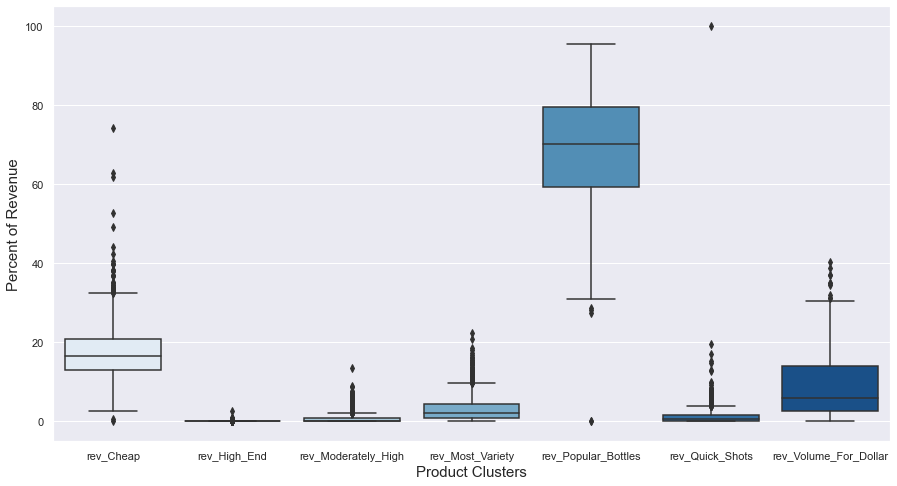

In [119]:
sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(data=stores_clust_info_combined4[product_clusters], palette='Blues')
box.set_xlabel('Product Clusters',fontsize=15)
box.set_ylabel('Percent of Revenue',fontsize=15)

In [54]:
# from sklearn.metrics import silhouette_score

# cluster_cols = ['tot_num_unique_items_scaled',       
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']
# # 'rev_Moderately_High_scaled',
# #  'cl_Cheap_scaled',
# #  'cl_High_End_scaled',
# #  'cl_Moderately_High_scaled',
# #  'cl_Most_Variety_scaled',
# #  'cl_Popular_Bottles_scaled',
 
# #  'cl_Volume_For_Dollar_scaled']

# df_scaled = stores_clust_info_combined4[cluster_cols]


# for clust in range(2,6):
#     model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
#     silhouette_avg = silhouette_score(df_scaled,model.labels_)
#     print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

# # cluster_cols = ['tot_num_unique_items_scaled',
# #  'rev_Cheap_scaled',
# #  'rev_Moderately_High_scaled',
# #  'rev_Most_Variety_scaled',
# #  'rev_Popular_Bottles_scaled',
# #  'rev_Volume_For_Dollar_scaled']

# # df_scaled = stores_clust_info_combined2[cluster_cols]

# inertia_scores = []

# for clust in range(2,6):
#     inertia = KMeans(n_clusters=clust, random_state=42)\
#               .fit(df_scaled).inertia_
#     inertia_scores.append(inertia)

# plt.plot(range(2,6), inertia_scores)
# plt.title("Inertia vs. number of clusters")
# plt.xlabel("Number of clusters: K")
# plt.ylabel('Inertia')
# plt.show()


### four clusters

In [55]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
# 'rev_Moderately_High_scaled',

model = KMeans(n_clusters=4, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['label_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [56]:

stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


In [57]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


### label_2 = 0 

### convenience stores

In [58]:
# 4 clusters
cols = ['Store_Name',  'City', 'Zip_Code',
        'County', 
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar']

#convenience stores

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols].sample(n=100) #convenience stores

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
458,Casey's General Store #2526 / Wellsburg,Wellsburg,50680,GRUNDY,"932,100,799.19",73,5,418,6.852002439596792,0.0,0.0,0.2362676077430432,86.70766352011843,6.003584208771094,18.38235294117647,0.0,0.0,0.4092769440654843,59.523809523809526,1.6055045871559634,1.5418502202643172
1188,Casey's General Store #3385 / Orange City,Orange City,51041,SIOUX,"852,232,104.5600001",78,6,371,6.09741362851246,0.0,0.0177425538407834,0.7496197861846952,91.0456313366182,1.8288665290363608,19.11764705882353,0.0,0.1140250855188141,0.6366530241018644,57.14285714285714,2.064220183486239,0.881057268722467
1061,Yesway Store # 10020/ Story City,Story City,50248,STORY,"607,884,911.9",88,5,379,10.340207537564316,0.0,0.0,0.7145979189420312,79.51374283320159,9.275621788960544,19.852941176470587,0.0,0.0,0.9095043201455209,61.90476190476191,1.376146788990826,1.9823788546255507
980,Raymond's Station / Garwin,Garwin,50632,TAMA,"68,754,315.2",42,4,59,19.67050393951128,0.0,0.0,2.485408348594824,70.82229976163009,7.0217879502638105,9.558823529411764,0.0,0.0,0.4547521600727603,35.714285714285715,0.0,0.881057268722467
935,Elma Locker and Grocery,Elma,50628,HOWARD,"1,122,825,555.15",108,6,575,14.72837273176486,0.0,0.0132956984560309,1.3431017730964758,72.45274920121683,11.44900544081636,18.38235294117647,0.0,0.1140250855188141,2.000909504320145,23.809523809523807,0.2293577981651376,5.947136563876652
7,DYNO'S 51 / SANBORN,Sanborn,51248,OBRIEN,"39,750,290.52",25,5,25,4.226546015191237,0.0,0.0,0.6279892718630625,78.74289478274736,15.344293689957162,2.2058823529411766,0.0,0.0,0.090950432014552,21.428571428571427,0.9174311926605504,1.5418502202643172
248,Casey's General Store #3202 / Cresce,Crescent,51526,POTTAWATTA,"621,140,712.79",93,5,362,14.262677780703074,0.0,0.0,0.9925078606277524,78.63520460703306,5.412295258991633,23.52941176470588,0.0,0.0,0.6366530241018644,59.523809523809526,3.440366972477064,1.5418502202643172
194,Kum & Go #1959 / Eldora,Eldora,50627,HARDIN,"431,966,974.71",69,5,236,10.719290915951603,0.0,0.0,0.3380394857686318,85.80556738598735,2.4895303992208286,16.176470588235293,0.0,0.0,0.3638017280582082,54.761904761904766,2.522935779816514,1.1013215859030838
266,Casey's General Store #3027 / Iowa Falls,Iowa Falls,50126,HARDIN,"562,059,641.55",96,6,328,11.483776168664498,0.0,0.002596699517466,0.5440978525991448,84.4165672634924,3.063560205553065,30.14705882352941,0.0,0.1140250855188141,0.5911778080945885,66.66666666666666,1.146788990825688,1.762114537444934
490,The Depot Tiffin,Tiffin,52340,JOHNSON,"1,045,926,587.46",177,7,650,12.73818196586338,0.1069480767972904,0.510198163425507,1.359796157829664,79.57113864952099,4.962432882220328,24.264705882352946,3.821656050955414,3.762827822120866,2.000909504320145,64.28571428571429,6.192660550458716,1.5418502202643172


In [59]:
cols2 = ['Store_Name',  'City', 'Zip_Code',
        'County', 
        'tot_num_unique_items', 'num_unique_clusters',
        'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar']

cols3=['cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Volume_For_Dollar']

In [60]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,"1,006.0","1,006.0","1,006.0","1,006.0","1,006.0","1,006.0","1,006.0","1,006.0"
mean,105.67,5.33,14.56,0.0,0.07,1.28,79.02,4.03
std,51.02,0.74,4.23,0.03,0.21,0.87,5.72,3.21
min,9.0,2.0,0.67,0.0,0.0,0.0,60.47,0.0
25%,76.0,5.0,11.6,0.0,0.0,0.75,74.78,1.88
50%,98.0,5.0,14.43,0.0,0.0,1.07,79.12,3.18
75%,122.0,6.0,17.53,0.0,0.02,1.53,83.17,5.35
max,508.0,7.0,27.68,0.91,2.34,7.12,95.45,18.35


In [61]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


In [124]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']



df_scaled = scale(stores_clust_info_combined4, cols1)
fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# plt.figure(figsize = (12,10))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is depreca

### label_2 = 1

### large supermarkets and liquor stores

In [62]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols].sample(n=100) #larger supermarkets and liquor stores

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1485,Hy-Vee / Waukee,Waukee,50263,DALLAS,"4,238,688,761.65",1206,7,9289,17.63218129228882,0.1710309392279604,2.84049254782113,13.59447373804561,43.930335670957575,20.766636209386377,57.35294117647059,18.471337579617835,20.524515393386544,28.558435652569347,73.80952380952381,24.541284403669724,33.70044052863436
1536,Hy-Vee Drugstore / University / DSM,Des Moines,50311,POLK,"3,000,492,742.08",797,7,4753,21.66797247905709,0.1016001841046519,1.0840981757366543,7.288327100848203,54.11883471427191,13.924243832377204,54.41176470588235,8.280254777070063,11.516533637400228,17.871759890859483,78.57142857142857,18.34862385321101,22.687224669603523
1916,Fareway Stores #648 / Ottumwa,Ottumwa,52501,WAPELLO,"844,073,236.36",536,7,1599,17.016960335031754,0.1017376873247695,2.595552047649099,10.845210820184947,37.05801482332407,31.98756612570106,34.55882352941176,7.006369426751593,11.174458380843785,10.641200545702592,57.14285714285714,3.440366972477064,23.568281938325992
835,A&Z Liquors / Hampton,Hampton,50441,FRANKLIN,"377,525,770.33",671,7,886,19.439053558079262,0.2837877501881529,3.8147638338467007,12.103474901874522,50.43802729640271,12.80266565584416,42.64705882352941,7.643312101910828,7.639680729760548,16.325602546612096,66.66666666666666,11.46788990825688,21.365638766519822
1351,Hy-Vee Drugstore #5 / Cedar Rapids,Cedar Rapids,52402,LINN,"3,328,607,276.36",908,7,5969,19.342290159686826,0.0142191081946313,1.1963847989165128,7.481468923613164,49.92346142219619,20.381469173554336,70.58823529411765,3.1847133757961785,10.034207525655644,19.14506593906321,76.19047619047619,23.39449541284404,36.12334801762114
924,New Star Fletcher / Waterloo,Waterloo,50701,BLACK HAWK,"983,671,457.12",735,7,1696,22.91757362768521,0.1645870466486958,1.8913889892131264,6.38290372110904,52.2461239858162,13.461821335926578,62.5,5.7324840764331215,10.034207525655644,13.688040018190089,83.33333333333334,27.29357798165137,21.58590308370044
1193,Hy-Vee / Charles City,Charles City,50616,FLOYD,"2,520,535,849.53",955,7,4313,20.43555139816984,0.0750153837467764,1.186917411850282,8.297646845967254,47.29089779866717,20.887719669933368,77.20588235294117,5.095541401273886,10.604332953249717,21.737153251477945,88.09523809523809,22.706422018348626,29.735682819383257
1189,Hy-Vee Food Store / Indianola,Indianola,50125,WARREN,"3,280,997,666.21",1057,7,5368,23.48427609642448,0.0477809096344434,1.4140323435094613,9.562482479373967,45.81655884036173,18.35821860445809,75.0,5.095541401273886,9.35005701254276,27.057753524329243,83.33333333333334,19.95412844036697,32.59911894273127
1887,Hy-Vee Food Store / Webster City,Webster City,50595,HAMILTON,"3,402,483,761.68",879,7,5693,25.20504412654582,0.0153810174171587,1.2414985139897574,9.769437377590112,44.913897565390485,17.81931505826307,78.67647058823529,3.1847133757961785,8.209806157354619,21.10050022737608,83.33333333333334,17.660550458715598,26.21145374449339
254,A A and M Inc / Perry,Perry,50220,DALLAS,"379,604,349.54",709,7,935,24.091912440103176,0.2367794523664403,4.744930030919477,13.507434428012797,46.19443911074634,9.617894964649986,59.55882352941176,8.280254777070063,11.402508551881414,15.3706230104593,71.42857142857143,15.825688073394495,17.180616740088105


In [63]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0
mean,941.43,6.93,21.69,0.15,2.18,9.95,48.09,16.68
std,353.84,0.26,3.67,0.17,1.23,2.92,7.17,5.77
min,126.0,6.0,15.21,0.0,0.38,3.87,30.88,2.09
25%,699.5,7.0,18.67,0.04,1.28,8.08,43.78,12.32
50%,987.0,7.0,21.51,0.09,2.0,9.51,47.65,16.78
75%,"1,158.0",7.0,23.92,0.18,2.73,11.37,52.8,20.4
max,"1,709.0",7.0,31.42,1.0,7.65,22.47,67.24,35.08


In [64]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,199.0,199.0,199.0,199.0,199.0,199.0
mean,62.18,9.43,12.67,21.81,75.89,28.18
std,16.49,7.02,7.15,9.24,17.21,11.0
min,16.91,0.0,0.68,2.77,26.19,4.41
25%,53.68,4.14,7.64,15.48,66.67,19.6
50%,65.44,7.64,11.29,22.92,80.95,29.07
75%,75.0,13.38,17.05,28.24,88.1,35.9
max,89.71,43.31,43.1,42.47,100.0,57.49


In [65]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


### label_2 == 2

### drug stores, Walmart, medium size grocery stores and liquor stores, don't carry high end

In [66]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1855,CENTER POINT FOODS,Center Point,52213,LINN,"1,141,509,431.76",218,5,1051,16.239156243693127,0.0,0.0,4.448638221210662,66.97175136707344,12.338079384315712,23.52941176470588,0.0,0.0,5.002273760800364,38.095238095238095,0.2293577981651376,12.995594713656388
1720,Brewski's Beverage,Council Bluffs,51503,POTTAWATTA,"1,000,902,378.06",181,5,1034,23.727854999237824,0.0,0.0,2.2642477644949155,61.66805010358354,10.682710155734126,42.64705882352941,0.0,0.0,1.8644838562983173,69.04761904761905,7.79816513761468,4.185022026431718
127,Walgreens #15647 / Sioux City,Sioux City,51104,WOODBURY,"278,542,775.21",95,5,189,19.195963259032112,0.0,0.0,2.4696965896220564,64.53170336027686,13.46420140020691,23.52941176470588,0.0,0.0,0.9549795361527968,42.85714285714285,0.4587155963302752,4.845814977973569
1088,Fareway Stores #987 / Davenport,Davenport,52806,SCOTT,"946,933,215.15",387,7,1224,17.226619738347658,0.1507988173985218,1.809925692308207,5.465323902679031,54.4402986179273,20.5548174555444,32.35294117647059,10.191082802547772,9.806157354618016,6.184629376989541,47.61904761904761,3.211009174311927,15.638766519823788
1094,Larchwood Quick Stop / Larchwood,Larchwood,51241,LYON,"161,740,638.31",128,6,181,14.76036403061726,0.0,0.5125792742396652,5.8076981692109655,67.65478123084328,10.564573930547882,13.970588235294118,0.0,0.2280501710376282,2.6375625284220097,33.33333333333333,3.669724770642202,4.185022026431718
1413,Target Store T-2041 / Des Moines,Des Moines,50322,Polk,"1,072,109,597.25",228,7,965,18.371960370957307,0.0034977767288147,0.8079729555839493,7.05687522003945,58.046239452223126,15.55056770386541,28.676470588235293,0.6369426751592357,1.026225769669327,5.320600272851296,42.85714285714285,1.146788990825688,8.590308370044053
93,CVS / Pharmacy #10480 / Urbandale,Urbandale,50323,POLK,"345,974,588.84",103,5,222,14.872400881382603,0.0,0.0,2.256401294145404,66.1551690652773,16.607733487782937,22.794117647058822,0.0,0.0,0.8640291041382447,35.714285714285715,0.4587155963302752,7.929515418502203
1125,Mcnally's Super Valu,Grinnell,50112,POWESHIEK,"1,341,383,997.49",625,7,1646,17.70670467475669,0.0072326231848254,1.3165602700677557,7.235667669482808,63.1963328969354,10.171849723517909,51.47058823529412,0.6369426751592357,8.209806157354619,14.91587085038654,66.66666666666666,9.403669724770642,18.722466960352424
1096,Fareway Stores #790 / Harlan,Harlan,51537,SHELBY,"1,074,011,749.25",312,7,1348,16.29978522509166,0.0042724001885494,1.029935808218534,6.236951621504805,47.81684802783828,28.574338557684083,29.411764705882355,0.6369426751592357,5.473204104903079,5.911778080945885,47.61904761904761,1.376146788990826,14.757709251101325
1718,"MK Minimart, Inc",West Burlington,52655,DES MOINES,"1,455,054,090.39",338,7,1893,17.489478675104856,0.0106422517913746,1.6944956247909286,2.896240257893414,62.911562536801966,11.056613565264724,47.794117647058826,4.45859872611465,3.192702394526796,3.2287403365165988,59.523809523809526,26.376146788990823,5.947136563876652


In [67]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0
mean,333.48,6.45,16.36,0.02,0.55,4.62,60.17,17.42
std,176.21,0.75,4.24,0.06,0.62,1.91,7.73,5.9
min,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,215.0,6.0,13.25,0.0,0.13,3.19,56.23,13.12
50%,295.0,7.0,16.51,0.0,0.38,4.36,61.65,17.09
75%,429.0,7.0,18.9,0.02,0.78,5.93,65.51,21.3
max,956.0,7.0,29.16,0.7,5.02,9.96,73.02,40.44


In [68]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,483.0,483.0,483.0,483.0,483.0,483.0
mean,37.9,1.57,2.27,6.6,56.99,13.32
std,14.39,2.54,2.74,4.28,16.52,6.42
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,27.94,0.0,0.4,3.59,42.86,8.59
50%,36.03,0.64,1.37,5.59,57.14,13.0
75%,47.06,1.91,3.19,9.21,69.05,17.4
max,75.0,15.29,19.27,21.56,97.62,36.34


In [69]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],

                                                      'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,"543,150,001.455",98.0,14.432105704622263,0.0,1.0739069696502113,79.11668171469579,3.1799916930963725
1,199,"2,662,499,643.86",987.0,21.51484522164545,1.999076440671624,9.511640323181798,47.65163462702034,16.781179171904455
2,483,"1,321,865,033.16",295.0,16.510242157523074,0.3793873025817029,4.36477399652658,61.64528054956925,17.094413302564462
3,237,"760,537,346.93",258.0,26.821135682063733,1.9421763396084004,2.9950577603169046,59.5541060359163,4.3624071877083885


### label_2 == 3

### smaller sized supermarkets and liquor stores that carry more high end products

In [70]:
#  4 Clusters smaller sized supermarkets and liquor stores that carry more high end products
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1601,Tequila Wine & Spirits,Kalona,52247,WASHINGTON,"345,094,075.45",164,6,313,20.75730522947753,0.0,1.957966186811278,4.182318439161717,62.428910385978064,10.261905810414572,20.588235294117645,0.0,1.026225769669327,2.910413824465666,45.23809523809524,4.587155963302752,5.286343612334802
1671,Southside Tobacco & Liquor,Des Moines,50315,POLK,"1,463,181,783.17",437,7,1733,19.87851493885135,0.1179171487675322,2.4446899982928523,3.2718807430940933,62.18150537446184,9.442557719702531,58.82352941176471,1.2738853503184715,5.017103762827822,5.95725329695316,80.95238095238095,24.08256880733945,9.030837004405283
1353,W-Mart,Davenport,52803,SCOTT,"1,208,298,147.86",307,7,1490,30.143428424107853,0.0305499930339022,2.8663693461204343,2.9157787092860867,55.55157538053036,4.676347240130578,53.67647058823529,1.2738853503184715,1.4823261117445838,3.0923146884947705,64.28571428571429,21.788990825688074,6.387665198237885
1854,Rolfe Heartland,Rolfe,50581,POCAHONTAS,"85,430,980.85000001",44,5,118,31.08163067520253,0.0,0.0,1.9224962111622528,63.37950853574918,2.294941800378498,8.088235294117647,0.0,0.0,0.3638017280582082,14.285714285714285,2.522935779816514,1.762114537444934
395,Sichanh Liquor Store,Storm Lake,50588,BUENA VIST,"155,555,349.12",99,7,200,31.73443056073802,0.7503961044113788,3.1765597698528056,3.8512382080660648,52.98983688205553,6.064402743696532,15.441176470588236,1.910828025477707,1.1402508551881414,1.5006821282401093,30.95238095238096,2.293577981651376,1.9823788546255507
1512,The Boonedocks,Arnolds Park,51331,DICKINSON,"4,947,599,845.79",435,7,3829,23.105389732007872,0.0311540983111556,1.2190295098606478,5.156093185003058,67.48559346550921,2.970131986624637,46.32352941176471,1.910828025477707,4.67502850627138,11.91450659390632,76.19047619047619,1.376146788990826,6.167400881057269
694,Sodes Green Acre,Guttenberg,52052,CLAYTON,"717,957,044.99",513,7,889,18.31647783494229,0.0214601738467718,1.588466218081173,6.355401908568993,72.31138343203125,0.8177830792205373,34.55882352941176,1.910828025477707,8.437856328392247,12.505684402000911,38.095238095238095,16.972477064220186,5.286343612334802
1715,Ehlinger's Vinton Express,Vinton,52349,BENTON,"2,909,873,413.21",420,7,2541,23.17346319495499,0.0062504533418641,0.1192164072928915,4.511553276648524,66.26192384853582,5.165143559774267,45.588235294117645,0.6369426751592357,1.3683010262257698,9.50432014552069,69.04761904761905,12.844036697247708,11.233480176211454
567,Hy-Vee Gas #2 / Coralville,Coralville,52241,JOHNSON,"71,236,834.04",64,5,122,30.630324429841828,0.0,0.0153923179598956,3.0334524114120778,57.790105869786345,0.0,11.76470588235294,0.0,0.2280501710376282,0.5002273760800363,19.047619047619047,6.192660550458716,0.0
1265,EZ Stop / Davenport,Davenport,52803,SCOTT,"643,601,920.63",270,7,932,25.03932022487632,0.0032512333057547,1.7826222113771009,2.2463186383670504,57.28926083208044,9.94609005475615,49.26470588235294,0.6369426751592357,0.798175598631699,2.6830377444292863,54.761904761904766,19.495412844036696,6.167400881057269


In [71]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0
mean,279.48,6.46,27.75,0.13,2.16,3.34,58.71,4.75
std,180.68,0.84,7.2,0.23,1.91,1.99,7.96,3.43
min,9.0,3.0,9.63,0.0,0.0,0.01,0.0,0.0
25%,130.0,6.0,23.62,0.0,0.78,1.93,55.58,1.99
50%,258.0,7.0,26.82,0.05,1.94,3.0,59.55,4.36
75%,388.0,7.0,30.25,0.19,3.06,4.25,63.7,7.02
max,793.0,7.0,74.13,2.77,13.46,12.42,76.61,17.01


In [72]:
# cols1 = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Moderately_High',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar']


# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,)
# fig.show()

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=600,)
# fig.show()

1. Red = Supermarkets with lots of alcohol variety
1. Blue = Smaller bodegas with lower variety that focus much more than other store types on selling popular bottles 
1. Green = Medium-sized mom and pop stores that carry some but not a ton of variety and exist in the middle between two other groups 

In [73]:
# features_for_graph = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar',
# 'rev_Moderately_High']

### label_2 = 0 

### convenience stores


### label_2 = 1
### Large =  large supermarkets and liquor stores with the most variety of products, carry more high end products 


### label_2 == 2
### Medium =  drug stores, Walmart, medium size grocery stores and liquor stores, don't carry high end


### label_2 == 3
### Smaller = smaller sized supermarkets and liquor stores that carry more high end products


In [74]:
clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}


stores_clust_info_combined4['Store_Cluster'] = stores_clust_info_combined4['label_2'].map(clust_dict)


In [75]:
stores_clust_info_combined4['Convenience'] = stores_clust_info_combined4['label_2' ]  == 0

In [76]:
# label_2 = 1
stores_clust_info_combined4['Large'] = stores_clust_info_combined4['label_2']  == 1
stores_clust_info_combined4['Large'].head()

0    False
1    False
2    False
3    False
4    False
Name: Large, dtype: bool

In [77]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 2
stores_clust_info_combined4['Medium'] = stores_clust_info_combined4['label_2']  == 2
stores_clust_info_combined4['Medium'].head()

0    False
1     True
2    False
3     True
4    False
Name: Medium, dtype: bool

In [78]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 3
stores_clust_info_combined4['Smaller'] = stores_clust_info_combined4['label_2']  == 3
stores_clust_info_combined4['Smaller'].head()

0    False
1    False
2    False
3    False
4     True
Name: Smaller, dtype: bool

In [79]:
stores_clust_info_combined4.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled,label_1,label_2,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,-1.002025381775859,-0.8122862959956105,0.39181712615719755,-0.5567704605715388,1.2312790133159208,0.051810878177559236,-1.1544175283619036,-1.6690385047887228,-0.43810044669216064,-0.4962548677508225,-0.6079823150321451,-2.6868170915983653,-0.6691034944174415,-0.793981224163699,-2.003922544380519,2,0,Convenience,True,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,-0.9778511389695026,-0.7920318789932395,0.8473994141210379,-0.5567704605715388,0.08062607913097579,-0.502546056237402,0.23785078974146998,-1.5828579001451166,-0.43810044669216064,-0.4962548677508225,-0.6017801563148121,-2.5485730881416297,-0.7735407138087961,-0.6603318837898688,-0.956813180120883,0,2,Medium,False,False,True,False


# write out stores_clust_info_combined4 

In [80]:
# stores_clust_info_combined4.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined4.csv')

In [81]:
stores_clust_info_combined4.shape

(1925, 63)

In [82]:
outliers_df

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,"4,028,389,918.1",1983,7,9923,22.306852041865653,0.297399497902889,3.6357689153159134,13.702351636068652,49.16512047706984,1.0891686495604729,9.80333878221658,11.367529980852565,1.279854882595989,12.738083240955357,51.49652322886224,5.280661090396049,6.066713695455003,11.770633880882798,6.101865859808371,2.4710035300050426,17.95259707513868,54.36207766011094,1.9667170953101365,7.261724659606656,9.88401412002017,88.97058823529412,31.210191082802545,40.59293044469784,49.02228285584357,92.85714285714286,33.02752293577982,43.17180616740088
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,"8,451,653,814.22",1823,7,13453,26.98651910532016,0.1955763995230026,2.9792234851876493,10.62478420045028,49.54070606696303,0.2039617341045919,9.469229008451288,17.527688991303055,1.4197576748680591,11.016130231175204,52.8506652791199,7.909016576228351,2.244852449267821,7.031888798037612,4.71749862863412,3.2912781130005486,20.899616017553484,55.62260010970928,1.6456390565002743,8.228195282501371,5.595172792100932,63.23529411764706,38.21656050955414,43.44355758266818,46.1118690313779,71.42857142857143,34.403669724770644,22.46696035242291
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.","7,370,230,566.75",2025,7,15428,18.839015207529226,0.5137403498720741,3.97409309189574,10.552697507846933,52.08916007254435,1.6330552383665022,12.39823853194518,11.647653616800625,2.2815659839253306,14.551464869069225,44.62665283899403,6.501166709878143,9.197562872698988,11.193933108633653,5.728395061728396,3.950617283950617,22.17283950617284,50.17283950617284,1.925925925925926,7.358024691358024,8.691358024691358,85.29411764705883,50.955414012738856,51

In [83]:
drops = ['store_revenue_scaled', 'tot_num_unique_items_scaled', 'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled' ,'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled',
'cl_High_End_scaled', 'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled', 'cl_Popular_Bottles_scaled', 
'cl_Quick_Shots_scaled', 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled'] 

In [84]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=drops) #.head(2)
stores_clust_info_combined4.shape

(1925, 48)

In [85]:

outliers_df['label_2'] = 9999
outliers_df['label_2'].head() 

1166    9999
1320    9999
1401    9999
1405    9999
1856    9999
Name: label_2, dtype: int64

In [86]:
outliers_df['Store_Cluster'] = 'outlier'
outliers_df['Store_Cluster'].head() 

1166    outlier
1320    outlier
1401    outlier
1405    outlier
1856    outlier
Name: Store_Cluster, dtype: object

In [87]:
# Convenience 	Large 	Medium 	Smaller

In [88]:
outliers_df['Convenience'] = False
outliers_df['Convenience'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Convenience, dtype: bool

In [89]:
outliers_df['Large'] = False
outliers_df['Large'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Large, dtype: bool

In [90]:
outliers_df['Medium'] = False
outliers_df['Medium'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Medium, dtype: bool

In [91]:
outliers_df['Smaller'] = False
outliers_df['Smaller'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Smaller, dtype: bool

In [92]:
stores_clust_info_combined4.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_1,label_2,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,2,0,Convenience,True,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,0,2,Medium,False,False,True,False


In [93]:
outliers_df.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_2,Store_Cluster,Convenience,Large,Medium,Smaller
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453,9999,outlier,False,False,False,False
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961,9999,outlier,False,False,False,False


In [94]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

In [95]:
type(outliers_df)

pandas.core.frame.DataFrame

In [96]:
# stores_clust_info_combined5 = 
# pd.concat([stores_clust_info_combined4,outliers_df]).head(2)

stores_clust_info_combined5 = pd.concat([stores_clust_info_combined4,outliers_df])
stores_clust_info_combined5.shape

(1930, 48)

In [97]:
stores_clust_info_combined5['outler'] = stores_clust_info_combined5['Store_Cluster'] == 'outlier'
np.sum(stores_clust_info_combined5['outler'])

5

In [98]:
stores_clust_info_combined5.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_1,label_2,Store_Cluster,Convenience,Large,Medium,Smaller,outler
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,2.0,0,Convenience,True,False,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,0.0,2,Medium,False,False,True,False,False
2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,"24,308,995.32",14,4,14,6.779766330548622,0.0,0.0,0.1961223792773349,86.98117977176855,0.0,6.042931518405508,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,2.2058823529411766,0.0,0.0,0.045475216007276,16.666666666666664,0.0,0.6607929515418502,2.0,0,Convenience,True,False,False,False,False
3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,"11,723,322.21",33,5,33,24.31773484454967,0.0,0.0,8.17652311204368,27.538225019919505,2.951211131132085,37.01630589235507,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,3.6764705882352944,0.0,0.0,0.4547521600727603,7.142857142857142,2.064220183486239,1.3215859030837005,0.0,2,Medium,False,False,True,False,False
4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,"6,766,721.37",13,4,13,49.1369431101609,0.0,0.0,6.083004124048927,44.51670514106007,0.2633476247301136,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,3.6764705882352944,0.0,0.0,0.1819008640291041,7.142857142857142,0.2293577981651376,0.0,0.0,3,Smaller,False,False,False,True,False


# write out stores_clust_info_combined5

In [99]:
# stores_clust_info_combined5.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined5.csv')

In [100]:
# store_counts_df = 
store_counts_df = stores_clust_info_combined5.groupby(['Zip_Code']).agg({'outler':'sum','Convenience':'sum','Large':'sum','Medium':'sum','Smaller':'sum'}).reset_index()

In [101]:
# df.rename(columns = {"Name": "Names"}, inplace = True)
          

# store_counts_df.rename(columns = {'Store_Number':'number_of_stores'}, inplace = True)

In [102]:
store_counts_df.columns

Index(['Zip_Code', 'outler', 'Convenience', 'Large', 'Medium', 'Smaller'], dtype='object')

In [103]:
# df.rename(columns = {"Name": "Names"}, 
#           inplace = True)

store_counts_df.rename(columns = {"outler": "outlier"},inplace = True)

In [104]:
store_counts_df.columns

Index(['Zip_Code', 'outlier', 'Convenience', 'Large', 'Medium', 'Smaller'], dtype='object')

# write out store_counts_df

In [105]:
# store_counts_df.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_counts_df.csv')

### boxplots of clusters

Text(0, 0.5, 'State Revenue')

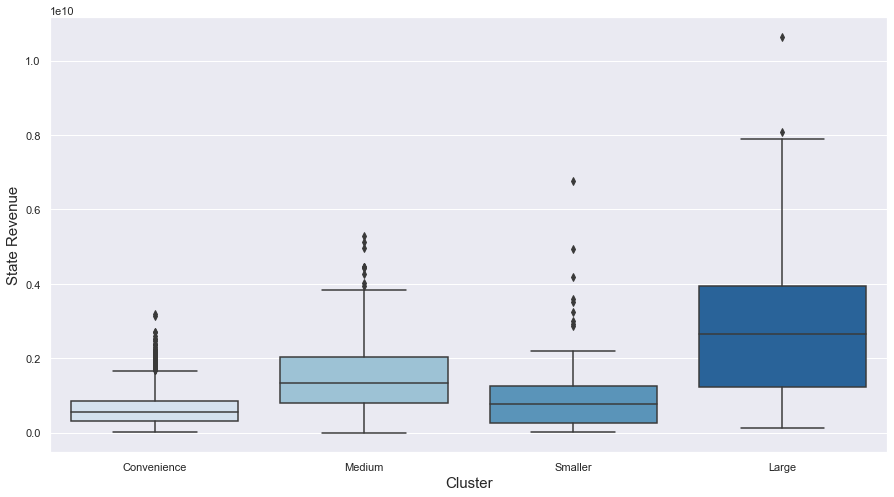

In [106]:
feature = 'store_revenue'


sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

box.set_xlabel('Cluster',fontsize=15)
box.set_ylabel('State Revenue',fontsize=15)
                 

# box.set_title(feature,fontsize=20)



In [107]:
# where do I put my store to make the most money
# don't worry about inventory

Text(0, 0.5, 'Number of Unique Products')

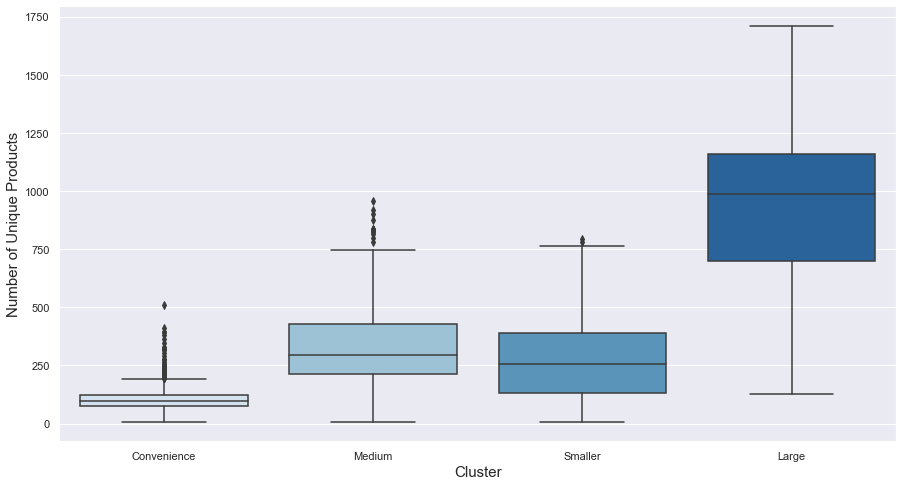

In [108]:
feature = 'tot_num_unique_items'


sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

box.set_xlabel('Cluster',fontsize=15)
box.set_ylabel('Number of Unique Products',fontsize=15)
                 

# box.set_title(feature,fontsize=20)


In [109]:
feature = 'tot_num_unique_items'

def box(feature,ylabel):

    sns.set(rc = {'figure.figsize':(15,8)})
    box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

    box.set_xlabel('Cluster',fontsize=15)
    box.set_ylabel(ylabel,fontsize=15)
                 


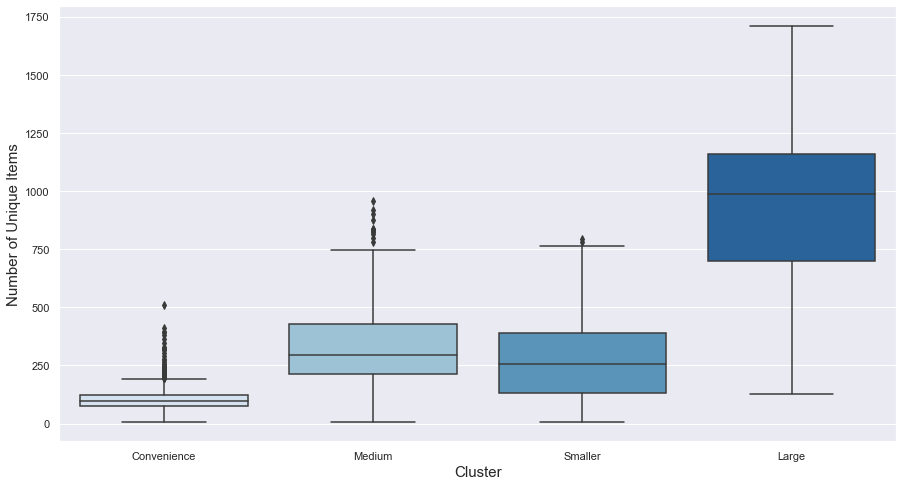

In [110]:
box('tot_num_unique_items','Number of Unique Items')

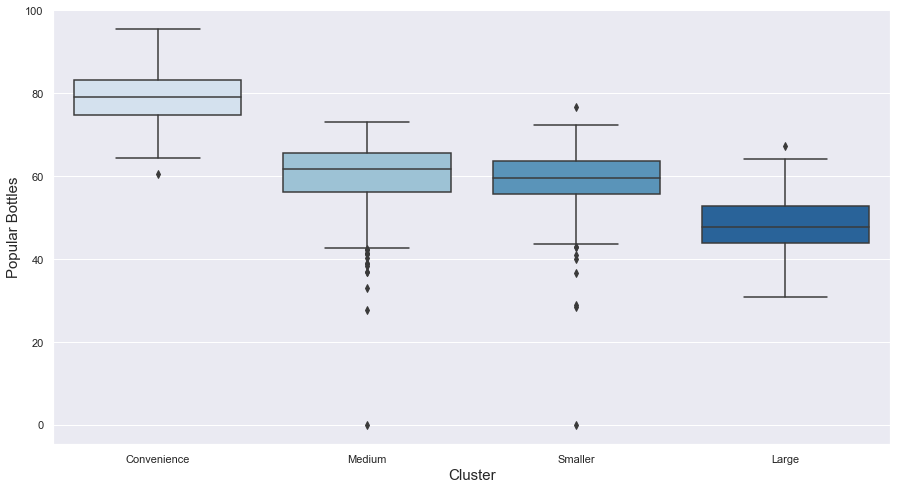

In [111]:
box('rev_Popular_Bottles','Popular Bottles')

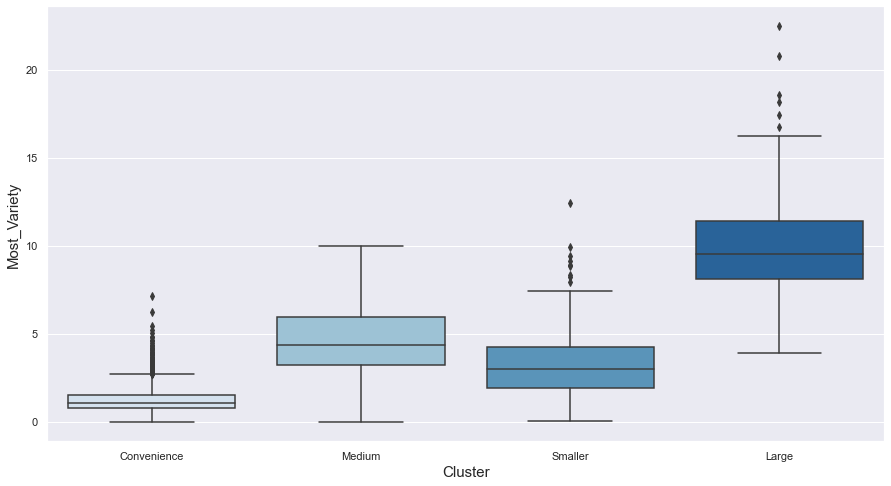

In [112]:
box('rev_Most_Variety','Most_Variety')

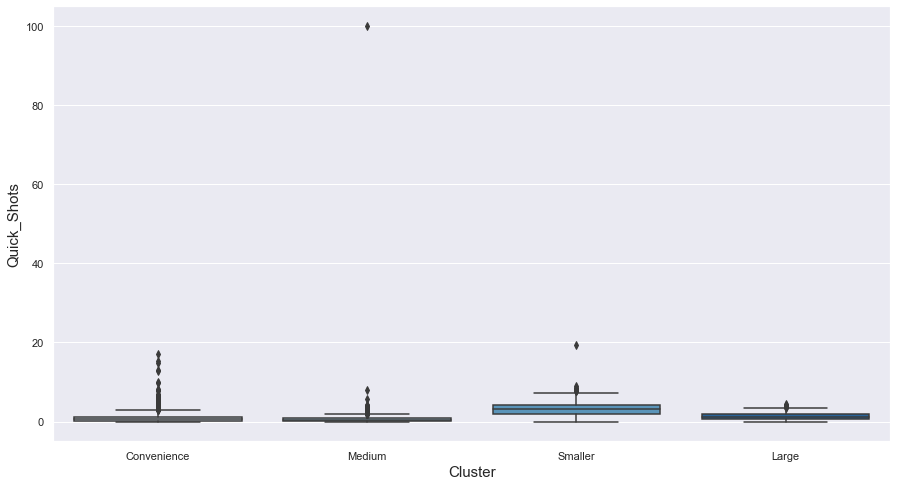

In [113]:
box('rev_Quick_Shots','Quick_Shots')

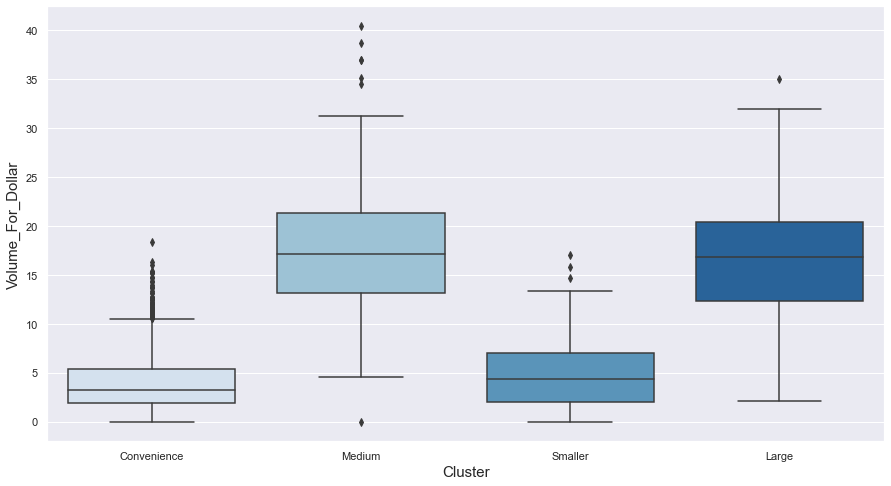

In [114]:
box('rev_Volume_For_Dollar','Volume_For_Dollar')

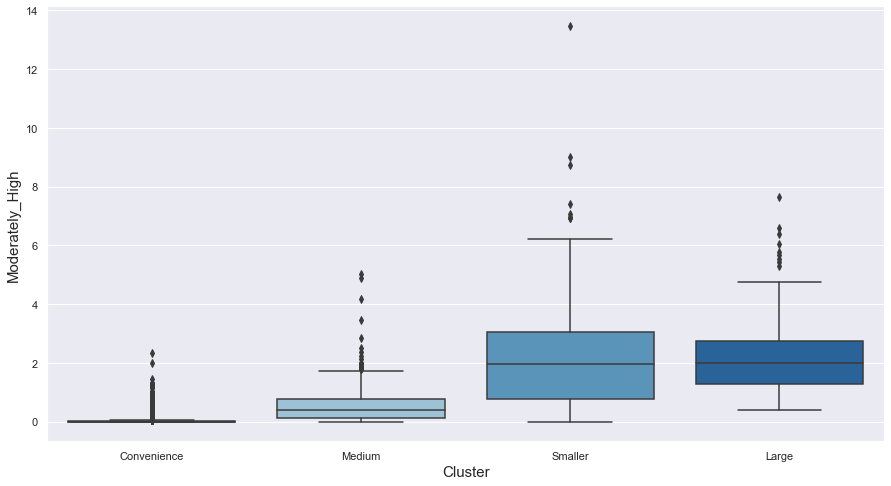

In [115]:
box('rev_Moderately_High','Moderately_High')

In [116]:
# stores_clust_info_combined4.columns

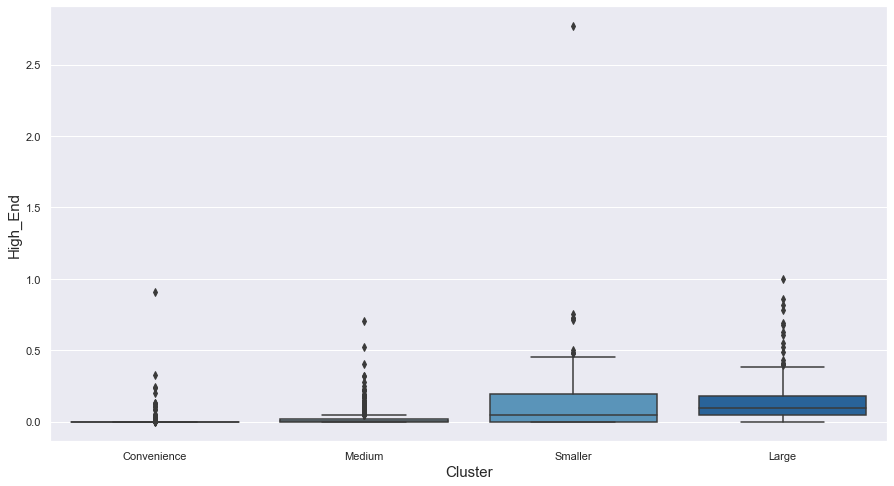

In [117]:
box('rev_High_End','High_End')